In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-prediction-dataset/Churn_Modelling.csv


***Reading the Churn_Modelling csv file***

In [3]:
df=pd.read_csv('/kaggle/input/customer-churn-prediction-dataset/Churn_Modelling.csv')

***Fetching first five rows of dataset from the top***

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


***Checking the shape of the dataset***

In [5]:
df.shape

(10000, 14)

*There are 10000 rows and 14 columns*

**Data preprocessing**
* removing null values
* removing missing values

***checking for null values***

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

*There are no null values*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


*checking for duplicated rows*

In [8]:
df.duplicated().sum()

0

There are no duplicate rows as well

***we are having a look at the data-output values***

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

*This dataset has 8k data for exited which is far more than that of non-exited so this is case of imbalanced dataset. Since we are doing this for getting familar with keras and tensorflow therefore we will continue although model may not be perfect*

***WE will some of the columns which are not needed for our model***

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [54]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**We will perform one-hot encoding for categorical columns**

In [13]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


**SCALING the dataset**

1. *Extracting the dataset*
2. *Splitting the dataset using train_test_split()*

In [15]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
X_train.shape

(7000, 11)

In [17]:
y_train.shape

(7000,)

In [18]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

x_train_scaled=scalar.fit_transform(X_train)
x_test_scaled=scalar.transform(X_test)

In [19]:
x_train_scaled

array([[-0.06042858, -0.18527928,  1.02868011, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [-1.74363086,  0.00532326,  0.33476465, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 0.31132161, -0.18527928,  1.72259557, ..., -0.58350885,
        -0.57273139, -1.08628092],
       ...,
       [ 0.22871046,  0.57713088,  1.37563784, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 0.13577291,  0.00532326,  1.02868011, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 1.16841234,  0.29122707,  0.33476465, ...,  1.71377008,
        -0.57273139,  0.92057219]])

In [20]:
x_test_scaled

array([[-1.03110965,  0.76773342, -1.05306628, ..., -0.58350885,
        -0.57273139,  0.92057219],
       [ 0.31132161, -0.47118309, -0.70610855, ..., -0.58350885,
        -0.57273139,  0.92057219],
       [-1.22731114,  0.29122707, -1.05306628, ..., -0.58350885,
        -0.57273139, -1.08628092],
       ...,
       [-0.05010219, -1.32889452, -1.74698174, ..., -0.58350885,
        -0.57273139,  0.92057219],
       [-0.38054681, -1.13829198, -0.01219309, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 0.17707849, -0.28058055, -0.70610855, ..., -0.58350885,
         1.74601919, -1.08628092]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

**lets create a model named as model having 3 layers- input,hidden,output**
1. input layer has 11 features
2. hidden layer has 3 preceptron and activation function is sigmoid
3. output layer has 1 perceptron and activation function is also sigmoid

In [22]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**loss function is log-loss(binary cross entropy) and sigmoid is the activation function. So the output is same as LOGISTIC REGRESSION(BINARY CLASSIFIER)**

In [25]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [26]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 0.5691
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5123
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4846
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4693
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4592
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4515
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4407
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4368
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4337


*we have trained our model and now we can get weights and bias for each  layers*

In [27]:
model.layers[0].get_weights()

[array([[ 0.32545787, -0.2286878 ,  0.13171023],
        [-1.5545044 , -1.5264481 , -0.91153705],
        [ 0.21129087,  0.28373986, -0.23289673],
        [-0.1268705 , -0.14531256, -0.3734514 ],
        [ 0.22745606,  0.21367635,  0.03691416],
        [-0.4419768 , -0.21690674,  0.33383757],
        [ 0.61814106,  0.7600929 ,  0.7141105 ],
        [ 0.22459508, -0.3122852 ,  0.01877036],
        [-0.41564348, -0.663193  , -0.7528194 ],
        [-0.23554076, -0.01723172, -0.02359525],
        [ 0.5102241 ,  0.21948059,  0.6997257 ]], dtype=float32),
 array([0.15962595, 0.17024487, 0.24105522], dtype=float32)]

In [28]:
model.layers[1].get_weights()

[array([[-0.5922224 ],
        [-0.63891494],
        [-1.4564129 ]], dtype=float32),
 array([-0.16528217], dtype=float32)]

In [30]:
model.predict(x_test_scaled)

94/94 [==============================] - 0s 1ms/step


array([[0.10432215],
       [0.12839398],
       [0.1278992 ],
       ...,
       [0.08596001],
       [0.15131737],
       [0.11569453]], dtype=float32)

**our ouput is between 0 and 1 as the activation is sigmoid. since our problem is classification problem so we need to convert the output in 0 and 1 format**

In [31]:
y_log=model.predict(x_test_scaled)

94/94 [==============================] - 0s 1ms/step


In [32]:
y_pred=np.where(y_log>0.5,1,0)

**import accuracy_score from sklearn.metrics for calculating accuracy**

In [33]:

accuracy_score(y_test,y_pred)

0.791

**our accuracy is around 0.79 that is 80 percent**

**We need to improve the accuracy of the model- below steps could be followed for better accuracy**
1. increasing the number of epoches
2. using relu activation function instead of sigmoid
3. increasing the number of hidden layers
4. increasing the number of perceptron in the hidden layers
5. increasing the number of input features 


**increasing the number of epoches to 100 from 10**

In [34]:
model.fit(x_train_scaled,y_train,epochs=100)
y_log=model.predict(x_test_scaled)
y_pred=np.where(y_log>0.5,1,0)
accuracy_score(y_test,y_pred)

Epoch 1/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4313
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4294
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4278
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4265
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4254
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4245
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4237
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4229
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4221
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4214
Epoch 11/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4206
Epoch 12/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4198
Epoch 13/100


0.8316666666666667

**just by increasing the number of epoches we could achieve the 83% accuracy**

In [36]:
model=Sequential()

#increasing the number of perceptron in hidden layer
model.add(Dense(10,activation='relu',input_dim=11))
#adding a new hidden layer
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)
y_log=model.predict(x_test_scaled)
y_pred=np.where(y_log>0.5,1,0)
accuracy_score(y_test,y_pred)

Epoch 1/100
175/175 [==============================] - 1s 4ms/step - loss: 0.7290 - accuracy: 0.5166 - val_loss: 0.5784 - val_accuracy: 0.7964
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7979 - val_loss: 0.4812 - val_accuracy: 0.7993
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7986 - val_loss: 0.4463 - val_accuracy: 0.7993
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8009 - val_loss: 0.4285 - val_accuracy: 0.8021
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8120 - val_loss: 0.4173 - val_accuracy: 0.8100
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8221 - val_loss: 0.4058 - val_accuracy: 0.8221
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8339 - val_loss: 0.3927 - val_accuracy: 0.8307

0.863

1. **training accuracy-0.8652**
2. **validation accuracy-0.8586**

*we are going this just for demo purpose so we will leave the accuracy here*

In [37]:
 history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8646 - val_loss: 0.3456 - val_accuracy: 0.8564
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8645 - val_loss: 0.3454 - val_accuracy: 0.8571
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8659 - val_loss: 0.3447 - val_accuracy: 0.8579
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8664 - val_loss: 0.3454 - val_accuracy: 0.8557
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8664 - val_loss: 0.3465 - val_accuracy: 0.8543
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8666 - val_loss: 0.3456 - val_accuracy: 0.8564
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8664 - val_loss: 0.3453 - val_accuracy: 0.8557

In [38]:
import matplotlib.pyplot as plt

In [39]:
history.history

{'loss': [0.3187355399131775,
  0.31883108615875244,
  0.3184534013271332,
  0.3185238838195801,
  0.3183307945728302,
  0.31835609674453735,
  0.3184005320072174,
  0.31825509667396545,
  0.3180440068244934,
  0.3181067407131195,
  0.31805935502052307,
  0.31726840138435364,
  0.3176812529563904,
  0.31821608543395996,
  0.3173265755176544,
  0.31723999977111816,
  0.317056804895401,
  0.3173145353794098,
  0.31686609983444214,
  0.3169083595275879,
  0.3169020712375641,
  0.3166651427745819,
  0.3169129192829132,
  0.316921591758728,
  0.3167862594127655,
  0.316405326128006,
  0.3163968026638031,
  0.31609880924224854,
  0.3160651922225952,
  0.3160971701145172,
  0.3163323402404785,
  0.31574204564094543,
  0.31577083468437195,
  0.3153521716594696,
  0.31555142998695374,
  0.3156234622001648,
  0.31549978256225586,
  0.31523287296295166,
  0.3148389458656311,
  0.31548061966896057,
  0.3150107264518738,
  0.31505587697029114,
  0.3149123787879944,
  0.31458571553230286,
  0.314827

plotting graph for training loss and validation loss

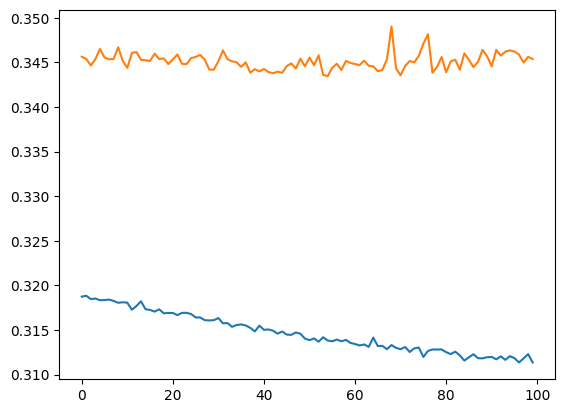

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plotting graph for accuracy and validation accuracy

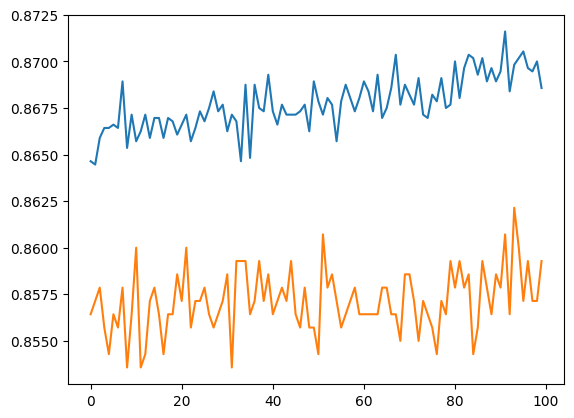

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])